# 서포트 벡터 머신(Support Vector Machines)

* 회귀, 분류, 이상치 탐지 등에 사용되는 지도학습 방법
* 클래스 사이의 경계에 위치한 데이터 포인트를 서포트 벡터(support vector)라고 함
* 분류를 진행할 때, 이 서포트 벡터만 사용하여 분류함
* 각 지지 벡터가 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지를 학습
* 각 지지 벡터 사이의 마진이 가장 큰 방향으로 학습
* 지지 벡터 까지의 거리와 지지 벡터의 중요도를 기반으로 예측을 수행
* SVM을 사용할 경우, 설정해주어야하는 하이퍼파라미터는 크게 2가지로 구분할 수 있음  
 -. cost : cost가 낮을 때는 margine을 넓게 형성하며 분류되고, 높을 때는 margine을 좁게 형성하며 분류가 이루어진다.(margine이 좁을 경우, 추후 보지 못한 데이터에 대해 분류성능이 낮아지는 결과를 초래할 수 있다.)  

 -. Gamma : 각각의 데이터의 영향을 미치는 정도를 설정하는 파라미터로써, Gamma가 높으면 영향을 미치는 정도가 작아지게 된다.


![support vector machine](https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/Svm_separating_hyperplanes.png/220px-Svm_separating_hyperplanes.png)

* H3은 두 클래스의 점들을 제대로 분류하고 있지 않음
* H1과 H2는 두 클래스의 점들을 분류하는데, H2가 H1보다 더 큰 마진을 갖고 분류하는 것을 확인할 수 있음

In [2]:
import multiprocessing
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use(["seaborn-whitegrid"])

In [41]:
from sklearn.svm import SVR, SVC
from sklearn.datasets import load_boston, load_iris, load_breast_cancer, load_diabetes, load_wine

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE

## SVM을 이용한 회귀 모델과 분류 모델

### SVM을 사용한 회귀 모델 (SVR)

In [10]:
X, y = load_boston(return_X_y=True)
X_train_all, X_test, y_train_all, y_test = train_test_split(X, y, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train_all, y_train_all, random_state=123)

model = SVR()
model.fit(X_train, y_train)

print("훈련데이터:", model.score(X_train, y_train))
print("검증데이터:", model.score(X_val, y_val))

훈련데이터: 0.23209739086400147
검증데이터: 0.16393678263748956


### SVM을 사용한 분류 모델 (SVC)

In [11]:
X, y = load_breast_cancer(return_X_y=True)
X_train_all, X_test, y_train_all, y_test = train_test_split(X, y, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train_all, y_train_all, random_state=123)

model = SVC()
model.fit(X_train, y_train)

print("훈련데이터:", model.score(X_train, y_train))
print("검증데이터:", model.score(X_val, y_val))

훈련데이터: 0.8840125391849529
검증데이터: 0.9532710280373832


## 커널 기법

* 입력 데이터를 고차원 공간에 사상해서 비선형 특징을 학습할 수 있도록 확장하는 방법
* scikit-learn에서는 Linear, Polynomial, RBF(Radial Basis Function)등 다양한 커널 기법을 지원

![kernel trick](https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_0011.png)

In [17]:
X,y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

linear_svr = SVR(kernel="linear")
linear_svr.fit(X_train, y_train)

print("linear_svr 학습데이터:", linear_svr.score(X_train, y_train))
print("linear_svr 테스트데이터:", linear_svr.score(X_test, y_test))
print()
print("-----------------------------------------------------------")
print()
polynomial = SVR(kernel="poly")
polynomial.fit(X_train, y_train)

print("polynomial 학습데이터:", polynomial.score(X_train, y_train))
print("polynomial 테스트데이터:", polynomial.score(X_test, y_test))
print()
print("-----------------------------------------------------------")
print()
rbf_svr = SVR(kernel="rbf")
rbf_svr.fit(X_train, y_train)

print("rbf_svr 학습데이터:", rbf_svr.score(X_train, y_train))
print("rbf_svr 테스트데이터:", rbf_svr.score(X_test, y_test))

linear_svr 학습데이터: 0.711333407603242
linear_svr 테스트데이터: 0.6020584261391339

-----------------------------------------------------------

polynomial 학습데이터: 0.18102103868304598
polynomial 테스트데이터: 0.2792142598616487

-----------------------------------------------------------

rbf_svr 학습데이터: 0.17813783698679442
rbf_svr 테스트데이터: 0.2962129740673506


In [20]:
X,y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

linear_svc = SVC(kernel="linear")
linear_svc.fit(X_train, y_train)

print("linear_svc 학습데이터:", linear_svc.score(X_train, y_train))
print("linear_svc 테스트데이터:", linear_svc.score(X_test, y_test))
print()
print("--------------------------")
print()
polynomial = SVC(kernel="poly")
polynomial.fit(X_train, y_train)

print("polynomial 학습데이터:", polynomial.score(X_train, y_train))
print("polynomial 테스트데이터:", polynomial.score(X_test, y_test))
print()
print("--------------------------")
print()
rbf_svc = SVC(kernel="rbf")
rbf_svc.fit(X_train, y_train)

print("rbf_svc 학습데이터:", rbf_svc.score(X_train, y_train))
print("rbf_svc 테스트데이터:", rbf_svc.score(X_test, y_test))

linear_svc 학습데이터: 0.9694835680751174
linear_svc 테스트데이터: 0.958041958041958

--------------------------

polynomial 학습데이터: 0.8990610328638498
polynomial 테스트데이터: 0.9440559440559441

--------------------------

rbf_svc 학습데이터: 0.9107981220657277
rbf_svc 테스트데이터: 0.951048951048951


## 매개변수 튜닝

* SVM은 사용하는 커널에 따라 다양한 매개변수 설정 가능
* 매개변수를 변경하면서 성능변화를 관찰

In [ ]:
X,y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [21]:
polynomial = SVC(kernel="poly", degree=2, C=0.1, gamma="auto")
polynomial.fit(X_train, y_train)

print("polynomial 학습데이터:", polynomial.score(X_train, y_train))
print("polynomial 테스트데이터:", polynomial.score(X_test, y_test))

polynomial 학습데이터: 0.9765258215962441
polynomial 테스트데이터: 0.958041958041958


In [24]:
rbf_svc = SVC(kernel="rbf", C=2.0, gamma="scale")
rbf_svc.fit(X_train, y_train)

print("rbf_svc 학습데이터:", rbf_svc.score(X_train, y_train))
print("rbf_svc 테스트데이터:", rbf_svc.score(X_test, y_test))

rbf_svc 학습데이터: 0.9131455399061033
rbf_svc 테스트데이터: 0.951048951048951


## 데이터 전처리

* SVM은 입력 데이터가 정규화 되어야 좋은 성능을 보임
* 주로 모든 특성 값을 [0, 1] 범위로 맞추는 방법을 사용
* scikit-learn의 StandardScaler 또는 MinMaxScaler를 사용해 정규화

In [26]:
X,y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [28]:
model = SVC()
model.fit(X_train, y_train)

print("svc 학습데이터:", model.score(X_train, y_train))
print("svc 테스트데이터:", model.score(X_test, y_test))

svc 학습데이터: 0.9107981220657277
svc 테스트데이터: 0.951048951048951


In [29]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
model.fit(X_train, y_train)

print("svc 학습데이터:", model.score(X_train, y_train))
print("svc 테스트데이터:", model.score(X_test, y_test))

svc 학습데이터: 0.9882629107981221
svc 테스트데이터: 0.972027972027972


In [31]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
model.fit(X_train, y_train)

print("svc 학습데이터:", model.score(X_train, y_train))
print("svc 테스트데이터:", model.score(X_test, y_test))

svc 학습데이터: 0.9835680751173709
svc 테스트데이터: 0.9790209790209791


## Linear SVR

### 보스턴 주택 가격

In [34]:
X,y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = SVR(kernel="linear")
model.fit(X_train, y_train)

print("학습데이터:", model.score(X_train, y_train))
print("테스트데이터:", model.score(X_test, y_test))

학습데이터: 0.7164067174178377
테스트데이터: 0.6056589279132581


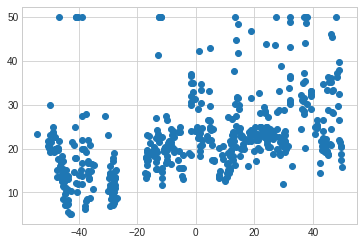

In [35]:
X_comp = TSNE(n_components=1).fit_transform(X)
plt.scatter(X_comp, y);

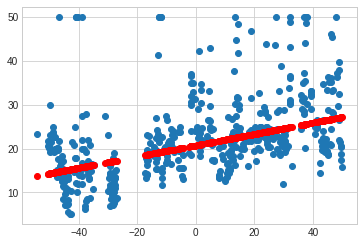

In [36]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp,y)
plt.scatter(X_comp,predict, color="r");
# 아래와 같이 예측이 진행되기 때문에 성능이 좋지 않게 나옴

In [38]:
from sklearn.model_selection import cross_validate
pipe = make_pipeline(StandardScaler(), SVR(kernel="linear"))

cross_validate(
    estimator = pipe,
    X=X, y=y,
    cv=5,
    n_jobs=-1, verbose=True
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


{'fit_time': array([0.0259223 , 0.02518439, 0.02358437, 0.0248642 , 0.01946926]),
 'score_time': array([0.00251293, 0.00258231, 0.00220299, 0.00246525, 0.00142145]),
 'test_score': array([0.76908568, 0.72180141, 0.56428426, 0.14083339, 0.07810211])}

In [59]:
pipe = Pipeline([("scaler", StandardScaler()),
                 ("model", SVR(kernel="linear"))])

param_grid = [{"model__gamma":["scale", "auto"],
               "model__C": [1.0, 0.1, 0.01],
               "model__epsilon": [1.0, 0.1, 0.01]}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs=-1,
    cv=5, verbose=True  # GridSearchCV의 iteration시마다 수행 결과 메시지를 출력함
)

gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='scale', kernel='linear',
                                            max_iter=-1, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__ga

In [60]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=1.0,
                     gamma='scale', kernel='linear', max_iter=-1,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

In [61]:
gs.best_score_

0.49854468515517

### 당뇨병

In [63]:
X,y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = SVR(kernel="linear")
model.fit(X_train, y_train)

print("학습데이터:", model.score(X_train, y_train))
print("테스트데이터:", model.score(X_test, y_test))

학습데이터: 0.5172618384880439
테스트데이터: 0.445120736196456


In [64]:
from sklearn.model_selection import cross_validate
pipe = make_pipeline(StandardScaler(), SVR(kernel="linear"))

cross_validate(
    estimator = pipe,
    X=X, y=y,
    cv=5,
    n_jobs=-1, verbose=True
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished


{'fit_time': array([0.02273893, 0.01092649, 0.01023555, 0.00988412, 0.01030374]),
 'score_time': array([0.00214839, 0.00197744, 0.00188589, 0.00207448, 0.00115585]),
 'test_score': array([0.43037242, 0.51653341, 0.48275332, 0.42247202, 0.53076481])}

In [65]:
pipe = Pipeline([("scaler", StandardScaler()),
                 ("model", SVR(kernel="linear"))])

param_grid = [{"model__gamma":["scale", "auto"],
               "model__C": [1.0, 0.1, 0.01],
               "model__epsilon": [1.0, 0.1, 0.01]}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs=-1,
    cv=5, verbose=True  # GridSearchCV의 iteration시마다 수행 결과 메시지를 출력함
)

gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('model',
                                        SVR(C=1.0, cache_size=200, coef0=0.0,
                                            degree=3, epsilon=0.1,
                                            gamma='scale', kernel='linear',
                                            max_iter=-1, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__ga

In [66]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=1.0,
                     gamma='scale', kernel='linear', max_iter=-1,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

In [67]:
gs.best_score_

0.4780769992158147

## Kernel SVR

### 보스턴 주택 가격

In [68]:
X,y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

model = SVR(kernel="rbf")
model.fit(X_train, y_train)

print("학습데이터:", model.score(X_train, y_train))
print("테스트데이터:", model.score(X_test, y_test))

학습데이터: 0.6841328682873293
테스트데이터: 0.649976605976003


In [71]:
estimator = make_pipeline(StandardScaler(), SVR(kernel="rbf"))

cross_validate(
    estimator = estimator,
    X=X, y=y,
    cv=5,
    n_jobs=-1,
    verbose=True
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


{'fit_time': array([0.02070475, 0.02071428, 0.01991749, 0.01948285, 0.01350236]),
 'score_time': array([0.00402212, 0.00400281, 0.00379682, 0.0039022 , 0.00242567]),
 'test_score': array([ 0.75781445,  0.50211018,  0.04310107,  0.33851703, -0.75997942])}

In [ ]:
pipe = Pipeline([("scaler", StandardScaler()),
                 ("model", SVR(kernel="rbf"))])

param_grid = [{"model__kernel": ["rbf", "polynomialk"]}]

### 당뇨병

## Linear SVC

### 유방암

### 붓꽃

### 와인

## Kernel SVC

### 유방암

### 붓꽃

### 와인